In [4]:
import numpy as np
import pandas as pd
import random
from fastai.tabular import *  # Quick accesss to tabular functionality

In [5]:
import fastai

In [9]:
#df = pd.read_csv('../data/train.csv',nrows=80000000,dtype={'acoustic_data':np.int16,'time_to_failure':np.float32})
df = pd.read_csv('../data/train.csv',nrows=80000000)

In [10]:
df.columns

Index(['acoustic_data', 'time_to_failure'], dtype='object')

In [11]:
df_slice_x = [df[i:(150000+i)]['acoustic_data'].values for i in range(0,80000000,150000)][:-1]
df_slice_y = [df[(150000+i):(150000+i+1)]['time_to_failure'].values for i in range(0,80000000,150000)][:-1]

In [12]:
x_mat = np.array(df_slice_x)

In [13]:
y_vec = np.array(df_slice_y)

In [14]:
x_mat.shape, y_vec.shape

((533, 150000), (533, 1))

In [15]:
x_df = pd.DataFrame(x_mat)

In [16]:
y_ser = pd.DataFrame(y_vec)

In [17]:
full_df = pd.concat([x_df.iloc[:,:100],y_ser],axis=1)

In [18]:
full_df.columns = range(0,len(full_df.columns))

In [19]:
full_df.columns

RangeIndex(start=0, stop=101, step=1)

In [68]:
doc(data.save)

In [33]:
full_df[100] = full_df[100].astype(np.long)

In [34]:
len_test = int(len(full_df)*.2)
dep_var = [100]
cont_names = list(full_df)[:-1]
procs = [FillMissing, Categorify, Normalize]
test = TabularList.from_df(full_df.iloc[:len_test].copy(), path='../data/',cont_names=cont_names)

In [35]:
full_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,12,6,8,5,8,8,9,7,-5,3,...,2,3,6,11,9,9,12,9,9,1
1,5,6,8,6,3,-1,5,4,4,4,...,7,10,8,9,6,3,3,8,9,1
2,5,5,8,9,9,10,11,12,13,5,...,3,3,10,3,4,6,4,2,0,1
3,5,-5,-4,1,3,4,6,12,15,17,...,7,6,6,4,5,8,6,6,7,1
4,12,6,4,-1,0,6,7,6,2,-2,...,6,4,6,2,6,7,7,3,1,1


In [36]:
data = (TabularList.from_df(full_df, path='../data/',cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(0,len_test)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [37]:
data.show_batch(rows=10)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,target
-1.4086,-1.4517,-1.3205,-1.2370,-0.3858,-0.3232,-0.9265,-0.5535,0.1597,0.3280,0.8772,1.5569,0.9818,0.6668,0.2511,0.4151,0.0916,-0.3933,0.2792,0.1106,-0.0306,0.0215,-0.0880,-0.3695,-0.1704,0.6655,0.3600,0.1750,1.3524,-0.0515,0.3230,0.4704,0.4784,0.5019,-0.1068,-0.4559,-0.2590,-0.1138,0.0856,0.9808,1.2721,0.4310,0.0606,-0.6861,-0.3002,-1.0035,-1.1816,-0.4256,-0.4561,-0.2842,-0.9808,-0.9315,-0.3871,0.2135,1.1520,0.9273,1.3483,1.3506,0.5720,0.5504,0.4659,0.0154,0.0366,-0.7884,-0.7901,-0.6012,-1.1069,-1.0972,-0.6863,0.3317,-0.2485,0.7758,0.7105,0.4406,0.4116,0.8177,1.3859,1.4409,0.8793,0.2457,-0.0874,-0.5820,-1.3024,-0.9817,0.2916,0.1286,-0.2719,0.2323,0.4118,-0.7620,-1.1653,0.0418,0.0625,0.6463,-0.2350,-0.7672,-0.5123,0.0625,-0.3047,-0.1107,2
-0.0966,-0.2685,-0.0994,0.0704,-0.2103,0.1917,0.0408,0.2099,0.0065,0.6456,0.8772,-0.1167,-0.3687,-0.6018,-0.6990,-0.3862,-0.3813,0.2533,0.7644,-0.0463,-0.6252,-0.1266,0.0629,-0.3695,-0.1704,-0.0297,0.7243,0.5487,-0.5159,-0.3525,-0.0843,-0.3373,-0.5209,0.0517,0.5661,-0.6327,-0.6074,-0.8333,-1.3405,-0.0977,0.7427,0.2477,0.5963,1.0271,0.2515,0.7187,-0.3078,-0.5980,-0.6414,-0.2842,0.2949,-0.0931,-0.5505,-0.4569,0.2808,0.4056,0.6006,-0.1636,0.3889,-0.1424,-0.1406,-0.2912,-0.4423,-0.1264,-0.4531,-0.2665,-0.7720,-0.0947,0.2376,0.7549,-0.2485,-0.7031,0.0510,0.0735,0.4116,-0.7272,-0.8664,-0.2402,0.2103,0.0746,-0.2652,0.1301,0.1425,-0.1848,0.1265,-0.0343,-0.2719,0.0523,0.2181,0.6598,0.6245,1.2653,-0.0945,-0.0996,0.0517,0.0800,-0.2038,-0.6308,0.6026,0.4776,14
-0.0966,-0.1205,-0.5573,0.0704,0.1405,1.0499,0.2020,0.5152,0.3129,0.4868,0.3236,0.8131,-0.3687,-0.7830,-0.2240,-0.8670,-0.3813,0.2533,0.6026,-0.0463,-0.6252,-0.4228,-0.2389,-0.3695,-0.0105,-0.0297,-0.0043,-0.5724,-0.1762,-0.0515,0.1873,-0.4719,0.0502,0.5019,0.3979,0.2514,-0.0848,0.4259,0.2638,0.2618,0.5662,-0.4855,0.4177,0.0753,0.2515,-0.3146,0.0417,-1.1152,-0.0855,-1.0648,-0.4341,-0.5961,-1.0405,-0.7921,-0.5905,0.0578,0.0398,0.0257,0.5720,0.7236,0.3142,0.1688,0.6753,-0.1264,0.3895,-0.4338,0.3999,0.0724,-0.0703,0.8960,0.0275,-0.4073,0.2159,-0.4771,0.4116,-0.7272,-0.6787,0.2642,0.8793,0.7593,0.8015,0.3081,0.3030,-0.1848,0.2916,-0.0343,-0.2719,0.0523,0.4118,0.6598,-0.1709,0.0418,-0.7227,-0.2487,-0.2350,-0.2024,-0.2038,-0.1108,-1.0305,-0.8951,9
0.3407,0.9148,-0.0994,-0.2564,0.4913,0.0201,-0.2816,-0.5535,-0.1468,0.1692,0.1391,0.0692,0.4030,-0.0581,-0.6990,-0.0657,0.0916,0.0916,0.4409,-0.6741,-0.4766,-0.5709,-0.2389,-0.6820,-0.4901,0.1441,0.5422,1.1093,-0.1762,-0.0515,-0.0843,-0.3373,0.9067,-0.0984,0.0615,0.4282,0.6118,1.1455,0.6203,-0.0977,0.2133,-0.3022,0.0606,0.0753,0.0676,-0.6590,-1.0068,0.2641,0.8410,0.1060,-0.0696,0.2423,0.1029,0.2135,-0.2420,0.2317,0.4137,1.1613,0.2058,0.0308,0.1626,0.3221,-0.4423,-0.2919,-0.2845,0.2355,-0.2698,0.0724,-0.6863,-0.5147,-0.3865,0.0364,0.5456,0.9912,0.8074,-0.3410,0.2598,-0.0720,0.0431,0.4169,0.8015,0.3081,-0.6602,-0.6629,-0.2038,0.1286,0.2201,-0.1277,0.2181,0.2535,0.8234,0.3913,0.2196,0.3479,-0.0916,0.6449,0.4133,0.0625,0.9655,0.4776,9
-0.5340,0.4711,0.3585,0.2338,0.4913,0.1917,0.3632,-0.7062,-0.6064,-0.1484,-0.2299,-0.6746,-0.1758,-0.2394,0.0927,0.2549,0.7221,-0.2317,-0.0443,-0.3602,0.4153,0.4658,-0.3898,-0.0571,0.1494,0.1441,-0.1864,0.5487,0.6730,0.0991,-0.0843,0.2011,-0.3781,-0.6987,-0.2750,0.0745,0.0893,0.2460,0.7986,0.0821,0.3897,0.4310,-0.6535,-0.6861,-0.3002,0.3743,0.9156,0.2641,-0.4561,1.0817,0.4772,0.4100,0.2662,0.2135,0.1065,-0.1161,-0.5209,-0.5421,0.7551,0.2040,-0.4439,-0.4445,0.5156,0.5356,0.2210,0.0682,-0.1023,-0.2618,-0.0703,0.6138,0.4414,0.0364,-0.2788,0.8076,1.4011,0.6246,0.0721,-0.0720,0.0431,-0.7813,0.0904,0.3081,-0.1786,0.1340,0.2916,0.2915,0.3841,0.2323,0.9927,0.0504,0.0279,-0.4826,-0.5657,-0.0996,0.4817,

In [53]:
learn = tabular_learner(data, layers=[400,700], metrics=accuracy)

In [54]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


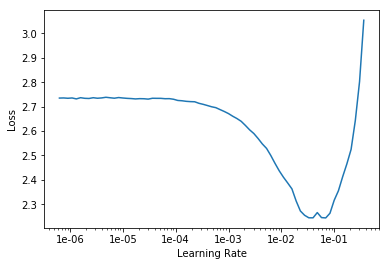

In [55]:
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(100,max_lr=1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,2.933317,2.711160,0.047170,00:02
1,2.536431,2.700452,0.075472,00:02
2,2.216146,2.746405,0.028302,00:02
3,1.907194,3.003314,0.056604,00:02
4,1.605576,3.344767,0.056604,00:02
5,1.328123,3.814813,0.066038,00:02
6,1.124881,4.892841,0.094340,00:02
7,0.980964,6.558910,0.047170,00:02
8,0.905106,6.555787,0.103774,00:02
9,0.907180,6.687734,0.047170,00:02


In [66]:
row = full_df.iloc[9]

In [67]:
learn.predict(row)

(Category 2,
 tensor(2),
 tensor([1.3937e-04, 3.0710e-04, 9.4839e-01, 4.7770e-02, 1.2243e-04, 5.2268e-04,
         6.3216e-05, 2.2829e-06, 1.2025e-06, 3.5505e-09, 1.3596e-07, 2.8374e-06,
         2.5307e-03, 1.4673e-04, 8.8428e-07]))

In [46]:
learn.save('first_test')

In [ ]:
learn.load('first_test')

# PyTorch

In [ ]:
xi = df_slice_x[0]
yi = df_slice_y[0]

In [ ]:
pd.concat([xi,yi])

In [ ]:
xdf.head()

In [ ]:
xdf = pd.DataFrame(columns=range(0,150000))
for i, (a,b) in enumerate(zip(df_slice_x,df_slice_y)):
    xdf.loc[i] = pd.concat([a,b])

In [ ]:
xandy = np.array([pd.concat([a,b]).values for i,(a,b) in enumerate(zip(df_slice_x,df_slice_y))] )

In [ ]:
xandy.shape

In [ ]:
def readhd5(f1, start, stop):
    df = pd.read_hdf(f1, start=start,stop=stop, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})
#     df = store.select('df',start=start,stop=stop)
    return df

df = readhd5(f1="train.hd5", start=700, stop=30000)
df


In [ ]:
data =  pd.read_hd5('train.h5', sep=",", chunksize=chunksize, iterator=True, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32}, low_memory=False)
i = 0 
for df in data:

Lets play pytorch...

In [ ]:
df = pd.read_csv('../data/train.csv',nrows=80000000)

In [ ]:
df_slice_x = [df[i:(150000+i)]['acoustic_data'].astype(np.float32).values for i in range(0,80000000,150000)][:-1]
df_slice_y = [df[(150000+i):(150000+i+1)]['time_to_failure'].astype(np.float32).values for i in range(0,80000000,150000)][:-1]

In [ ]:
x = torch.randn(N, D_in)


In [ ]:
x = torch.tensor(np.array(df_slice_x),dtype=torch.float32)
y = torch.tensor(np.array(df_slice_y).reshape((-1,1)),dtype=torch.float32)

In [ ]:
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 150000, 100, 1

# Create random Tensors to hold inputs and outputs
#x = torch.randn(N, D_in)
#y = torch.randn(N, D_out)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

In [ ]:
model(x[0])

In [ ]:
x[0].shape